<a href="https://colab.research.google.com/github/sultanbst123/satisfaction-prediction-/blob/main/Satisfaction_prediction(modelling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

In [ ]:
!pip install optuna

In [ ]:
!pip install borutashap

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from BorutaShap import BorutaShap
 
# classification
import xgboost, lightgbm, catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, StackingClassifier, GradientBoostingClassifier,
                             AdaBoostClassifier, HistGradientBoostingClassifier) 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
 
# regression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                             AdaBoostRegressor, HistGradientBoostingRegressor) 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

#preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            log_loss, roc_auc_score, plot_roc_curve,plot_confusion_matrix) 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
 
import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Satisfaction prediction/train_satisfaction(clean).csv")
test = pd.read_csv("/content/drive/MyDrive/Satisfaction prediction/test_satisfaction(clean).csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103594 non-null  object
 1   Customer Type                      103594 non-null  object
 2   Age                                103594 non-null  int64 
 3   Type of Travel                     103594 non-null  object
 4   Class                              103594 non-null  object
 5   Flight Distance                    103594 non-null  int64 
 6   Inflight wifi service              103594 non-null  int64 
 7   Departure/Arrival time convenient  103594 non-null  int64 
 8   Ease of Online booking             103594 non-null  int64 
 9   Gate location                      103594 non-null  int64 
 10  Food and drink                     103594 non-null  int64 
 11  Online boarding                    103594 non-null  

In [ ]:
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Arrival Delay in Hours,Departure Delay in Hours,Arrival lebih 1 jam/tidak,Departure lebih 1 jam/tidak
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18,neutral or dissatisfied,0,0,No,No
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6,neutral or dissatisfied,0,0,No,No
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,satisfied,0,0,No,No
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9,neutral or dissatisfied,0,0,No,No
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,satisfied,0,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0,neutral or dissatisfied,0,0,No,No
103590,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0,satisfied,0,0,No,No
103591,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14,neutral or dissatisfied,0,0,No,No
103592,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0,neutral or dissatisfied,0,0,No,No


In [ ]:
x = train.drop("satisfaction", axis=1) 
y = train.satisfaction

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_val.shape

((82875, 26), (20719, 26))

In [ ]:
cater = x.select_dtypes("object").columns
cater

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Arrival lebih 1 jam/tidak', 'Departure lebih 1 jam/tidak'],
      dtype='object')

In [ ]:
acc_val = []
acc_train = []
roc_auc = []

#model-1
 -RandomForest, 
 -DecisionTree,
 -Xgboost, 
 -GradientBoosting,
 -HistGradientBoosting,
 -AdaBoosting, 
 -ExtraTree.

In [ ]:
x_train_1 = x_train
x_val_1 = x_val

In [ ]:
dic = {}
for i in cater:
    dic[i] = LabelEncoder()
    x_train_1[i] = dic[i].fit_transform(x_train_1[i])
    x_val_1[i] = dic[i].transform(x_val_1[i])

In [ ]:
x_train_1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Arrival Delay in Hours,Departure Delay in Hours,Arrival lebih 1 jam/tidak,Departure lebih 1 jam/tidak
18060,0,0,41,0,0,2660,3,3,3,3,5,5,5,2,2,2,2,3,2,4,0,2,0,0,0,0
66327,0,0,19,0,0,491,5,3,5,5,4,4,4,4,2,2,1,2,3,4,0,0,0,0,0,0
62887,1,0,29,0,0,2076,3,2,3,3,4,4,4,3,4,5,5,4,5,4,131,119,1,2,0,1
26251,1,0,52,0,0,2310,4,4,4,4,4,5,4,4,4,4,4,4,4,5,10,10,0,0,0,0
65452,1,0,54,0,0,685,1,1,1,1,4,5,5,5,5,5,5,3,5,5,0,8,0,0,0,0


In [ ]:
XGB = XGBClassifier(learning_rate = 0.01,random_state=10) 
ADA = AdaBoostClassifier(learning_rate=0.01, random_state=10)
GBT = GradientBoostingClassifier(learning_rate=0.01, random_state=10)
HGBT = HistGradientBoostingClassifier(learning_rate=0.01, random_state=10)
DT = DecisionTreeClassifier(random_state=10)
RF = RandomForestClassifier(random_state=10)
EXT = ExtraTreeClassifier(random_state=10)

In [ ]:
def score_1(model,x_train, y_train, x_val, y_val):
    #fit model
    model.fit(x_train,y_train)
 
    #score train dan val
    acc_train.append(model.score(x_train, y_train)) 
    acc_val.append(model.score(x_val, y_val)) 
        
    #roc auc score
    pred = model.predict_proba(x_val)[:,-1]
    auc = roc_auc_score(y_val, pred) 
    roc_auc.append(auc) 
    
    return model

In [ ]:
for i in [XGB,ADA,GBT,HGBT,DT,RF,EXT]:
    print(30*"-")
    print(i)
    score_1(i, x_train_1, y_train, x_val_1, y_val)
    print(10*"->" + " DONE")

------------------------------
XGBClassifier(learning_rate=0.01, random_state=10)
->->->->->->->->->-> DONE
------------------------------
AdaBoostClassifier(learning_rate=0.01, random_state=10)
->->->->->->->->->-> DONE
------------------------------
GradientBoostingClassifier(learning_rate=0.01, random_state=10)
->->->->->->->->->-> DONE
------------------------------
HistGradientBoostingClassifier(learning_rate=0.01, random_state=10)
->->->->->->->->->-> DONE
------------------------------
DecisionTreeClassifier(random_state=10)
->->->->->->->->->-> DONE
------------------------------
RandomForestClassifier(random_state=10)
->->->->->->->->->-> DONE
------------------------------
ExtraTreeClassifier(random_state=10)
->->->->->->->->->-> DONE


#MODEL -2
-LGBM, 
-CatBoost.

In [ ]:
x_train_2 = x_train 
x_val_2 = x_val

In [ ]:
for i in [x_train_2, x_val_2]: 
    i[cater] = i[cater].astype("category")

In [ ]:
x_train_2.dtypes

Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Inflight service                        int64
Cleanliness                             int64
Departure Delay in Minutes              int64
Arrival Delay in Minutes          

In [ ]:
LGBM = LGBMClassifier(learning_rate=0.01, random_state=10) 
CB = CatBoostClassifier(learning_rate=0.01, random_state=10)

In [ ]:
def score_2(model,x_train, y_train, x_val, y_val):
       
    #lgbm
    if model == LGBM:
       #fit model
       model.fit(x_train,y_train,verbose=False)
 
       #accuracy train dan val
       acc_train.append(model.score(x_train, y_train))
       acc_val.append(model.score(x_val, y_val))
     
       #roc_auc
       pred = model.predict_proba(x_val)[:,-1]
       auc = roc_auc_score(y_val, pred)
       roc_auc.append(auc)
 
   #catboost
    else:         
       model.fit(x_train,y_train,cat_features=cater.to_list(),verbose=False)
 
       #accuracy train dan val
       acc_train.append(model.score(x_train, y_train))
       acc_val.append(model.score(x_val, y_val))
          
       #roc_auc
       pred = model.predict_proba(x_val)[:,-1]
       auc = roc_auc_score(y_val, pred) 
       roc_auc.append(auc)

    return model

In [ ]:
for i in [LGBM,CB]:
    print(30*"-")
    print(i)
    score_2(i, x_train_2, y_train, x_val_2, y_val)
    print(10*"->" + " DONE")

------------------------------
LGBMClassifier(learning_rate=0.01, random_state=10)
->->->->->->->->->-> DONE
------------------------------
->->->->->->->->->-> DONE


#MODEL -3
-KNN, 
-SVM, 
-LOGISTICREGRESSION

In [ ]:
x_train_3 = x_train_1
x_val_3 = x_val_1

In [ ]:
x_train_3

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Arrival Delay in Hours,Departure Delay in Hours,Arrival lebih 1 jam/tidak,Departure lebih 1 jam/tidak
18060,0,0,41,0,0,2660,3,3,3,3,5,5,5,2,2,2,2,3,2,4,0,2,0,0,0,0
66327,0,0,19,0,0,491,5,3,5,5,4,4,4,4,2,2,1,2,3,4,0,0,0,0,0,0
62887,1,0,29,0,0,2076,3,2,3,3,4,4,4,3,4,5,5,4,5,4,131,119,1,2,0,1
26251,1,0,52,0,0,2310,4,4,4,4,4,5,4,4,4,4,4,4,4,5,10,10,0,0,0,0
65452,1,0,54,0,0,685,1,1,1,1,4,5,5,5,5,5,5,3,5,5,0,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0,61,1,2,458,4,5,4,2,5,4,4,1,1,4,1,3,1,5,0,0,0,0,0,0
54886,1,0,39,0,0,251,2,1,1,1,1,4,4,2,2,2,2,3,2,2,0,0,0,0,0,0
76820,0,1,34,0,0,1072,2,2,2,1,2,2,2,2,5,2,4,3,4,2,29,25,0,0,0,0
860,0,0,24,0,0,1013,3,3,3,3,3,3,3,3,1,1,2,2,2,3,25,13,0,0,0,0


In [ ]:
sc = StandardScaler()
x_train_3 = sc.fit_transform(x_train_3)
x_val_3 = sc.transform(x_val_3)

In [ ]:
LG = LogisticRegression()#default l2
#SVM = SVC(kernel="linear", probability = True)
#KNN = KNeighborsClassifier()
#SVM AND KNN NOT RECOMMEND FOR HIGH DIMENSION

In [ ]:
def score_3(model,x_train, y_train, x_val, y_val):
    #fit model
    model.fit(x_train,y_train)
 
    #score train dan val
    acc_train.append(model.score(x_train, y_train)) 
    acc_val.append(model.score(x_val, y_val)) 
        
    #roc auc score
    pred = model.predict_proba(x_val)[:,-1]
    auc = roc_auc_score(y_val, pred) 
    roc_auc.append(auc) 
    
    return model

In [ ]:
for i in [LG]:
    print(30*"-")
    print(i)
    score_3(i, x_train_3, y_train, x_val_3, y_val)
    print(10*"->" + " DONE")

------------------------------
LogisticRegression()
->->->->->->->->->-> DONE


#MODEL SELECTION

In [ ]:
all_models = pd.DataFrame({"models": ["XGB", "ADA", "GBT", "HGBT", "DT", "RF", "EXT","LGBM","CB","LG"], 
                          "Train_accuracy": acc_train, 
                          "Val_accuracy": acc_val,
                          "Roc_auc_score": roc_auc})
all_models = all_models.set_index("models")

In [ ]:
all_models

,Train_accuracy,Val_accuracy,Roc_auc_score
models,,,
XGB,0.899873,0.902650,0.967505
ADA,0.786534,0.792316,0.888165
GBT,0.901104,0.903470,0.967799
HGBT,0.939741,0.940779,0.982632
DT,1.000000,0.945171,0.944410
RF,1.000000,0.962353,0.994083
EXT,1.000000,0.922052,0.920673
LGBM,0.939487,0.940634,0.982678
CB,0.961919,0.960375,0.993957


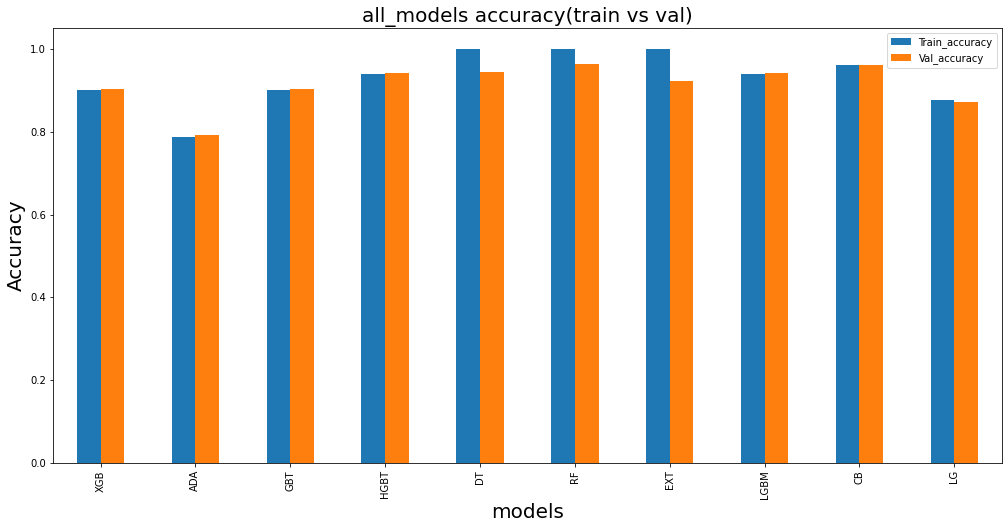

In [ ]:
all_models[["Train_accuracy","Val_accuracy"]].plot(kind="bar", figsize=(17, 8))
plt.title("all_models accuracy(train vs val)", size=20)
plt.xlabel("models", size=20)
plt.ylabel("Accuracy", size=20)
plt.show()

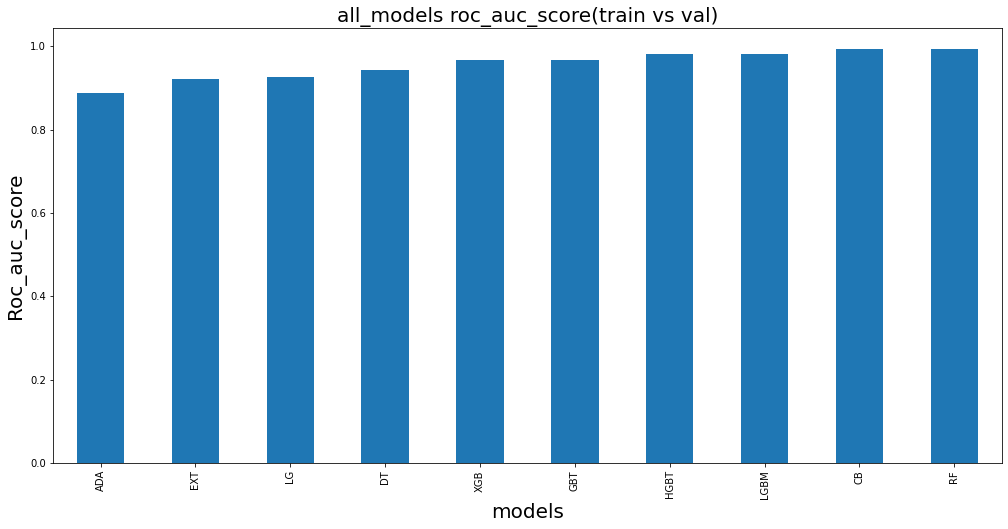

In [ ]:
all_models["Roc_auc_score"].sort_values().plot(kind="bar", figsize=(17, 8))
plt.title("all_models roc_auc_score(train vs val)", size=20)
plt.xlabel("models", size=20)
plt.ylabel("Roc_auc_score", size=20)
plt.show()

#CROSS VALIDATION(StratifiedKFold)

In [ ]:

# kfold 5 split
val_pred = []
test_pred = []
accuracy_val = []

def cross_val(X, y, test, model, params, folds=5):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold + 1}")
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

        alg = model(**params)
        alg.fit(X_train, y_train)

        #predict x_val per 5 fold   
        pred = alg.predict(X_val)
        val_pred.append(pred)

        #hitung accuracy
        acc = accuracy_score(y_val, pred) 
        accuracy_val.append(acc)
  
        #predict test per 5 fold
        y_pred = alg.predict(test)
        test_pred.append(y_pred)

        print(f"accuracy: {acc}")
        print("-"*50)

    print(f"\nmean accuracy folds: {np.array(accuracy_val).mean()}")
    return alg

In [ ]:
x_new = pd.concat([x_train_2, x_val_2])
x_new

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Arrival Delay in Hours,Departure Delay in Hours,Arrival lebih 1 jam/tidak,Departure lebih 1 jam/tidak
18060,0,0,41,0,0,2660,3,3,3,3,5,5,5,2,2,2,2,3,2,4,0,2,0,0,0,0
66327,0,0,19,0,0,491,5,3,5,5,4,4,4,4,2,2,1,2,3,4,0,0,0,0,0,0
62887,1,0,29,0,0,2076,3,2,3,3,4,4,4,3,4,5,5,4,5,4,131,119,1,2,0,1
26251,1,0,52,0,0,2310,4,4,4,4,4,5,4,4,4,4,4,4,4,5,10,10,0,0,0,0
65452,1,0,54,0,0,685,1,1,1,1,4,5,5,5,5,5,5,3,5,5,0,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13466,0,0,45,0,0,622,1,2,5,2,3,4,3,1,1,1,1,3,1,4,20,27,0,0,0,0
59404,1,0,36,0,0,2329,1,1,5,1,2,4,5,5,5,5,5,5,5,5,10,12,0,0,0,0
84713,1,0,69,0,0,488,3,3,3,3,4,4,1,4,4,4,4,2,4,4,2,0,0,0,0,0
43975,1,0,15,1,1,1062,3,4,3,3,3,3,3,3,3,3,4,4,4,3,0,0,0,0,0,0


In [ ]:
y_new = pd.concat([y_train, y_val])
y_new

18060                  satisfied
66327                  satisfied
62887                  satisfied
26251                  satisfied
65452                  satisfied
                  ...           
13466    neutral or dissatisfied
59404                  satisfied
84713                  satisfied
43975    neutral or dissatisfied
43721                  satisfied
Name: satisfaction, Length: 103594, dtype: object

In [ ]:
new_test = test

In [ ]:
for i in cater:
    new_test[i] = dic[i].transform(new_test[i])

In [ ]:
new_test = new_test.drop("satisfaction", axis=1)

In [ ]:
rf_params = dict(class_weight="balanced", random_state=42)
rf_params

{'class_weight': 'balanced', 'random_state': 42}

In [ ]:
score_rf = cross_val(x_new, y_new, new_test, RandomForestClassifier, rf_params)

Fold: 1
accuracy: 0.961581157391766
--------------------------------------------------
Fold: 2
accuracy: 0.9621120710458999
--------------------------------------------------
Fold: 3
accuracy: 0.9664559100342681
--------------------------------------------------
Fold: 4
accuracy: 0.9613398330035233
--------------------------------------------------
Fold: 5
accuracy: 0.9599864851819674
--------------------------------------------------

mean accuracy folds: 0.9622950913314849


In [ ]:
print(f"validation_accuracy: {score_rf.score(x_val_2, y_val)}")
print(f"training_accuracy: {score_rf.score(x_train_2, y_train)}")

validation_accuracy: 0.9918432356773975
training_accuracy: 0.9920361990950226


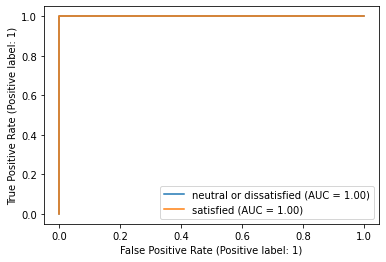

In [ ]:
#roc curve score
y_val_ohe = pd.get_dummies(y_val)
label = {}
for i in range(y_val_ohe.shape[1]): 
    rf = RandomForestClassifier(class_weight="balanced").fit(x_val_2, y_val_ohe.iloc[:,i]) 
    ax = plt.gca()
    label[i] = plot_roc_curve(rf, x_val_2, y_val_ohe.iloc[:,i], name = y_val_ohe.iloc[:,i].name, ax=ax)
plt.show()

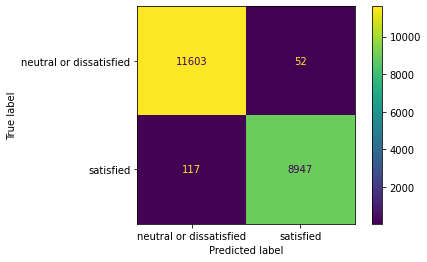

In [ ]:
plot_confusion_matrix(score_rf, x_val_2, y_val)

In [ ]:
classification_report(y_val, score_rf.predict(x_val_2))

'                         precision    recall  f1-score   support\n\nneutral or dissatisfied       0.99      1.00      0.99     11655\n              satisfied       0.99      0.99      0.99      9064\n\n               accuracy                           0.99     20719\n              macro avg       0.99      0.99      0.99     20719\n           weighted avg       0.99      0.99      0.99     20719\n'

#FINAL PREDICTION for unseen data

In [ ]:
y_predict = score_rf.predict(new_test)

In [ ]:
accuracy_score(test.satisfaction, y_predict)

0.9638512339242267

In [ ]:
classification_report(test.satisfaction, y_predict)

'                         precision    recall  f1-score   support\n\nneutral or dissatisfied       0.96      0.98      0.97     14528\n              satisfied       0.97      0.94      0.96     11365\n\n               accuracy                           0.96     25893\n              macro avg       0.97      0.96      0.96     25893\n           weighted avg       0.96      0.96      0.96     25893\n'